# **Initialize**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving development_dataset.csv to development_dataset.csv


In [ ]:
# Import data
train_df = pd.read_csv(io.StringIO(uploaded['development_dataset.csv'].decode('utf-8')))
#test_df = pd.read_csv(io.StringIO(uploaded['Evaluation_dataset.csv'].decode('utf-8')))

In [ ]:
# Dropping Index Variable
train_df.head(10)
train_df = train_df.drop(['VAR1'], axis=1)

In [ ]:
# Replace NaN values
train_df.mean()
train_df.fillna(train_df.mean(), inplace=True)

In [ ]:
# Dropping Rows having . in VAR14 (total_cards)
train_df = train_df[train_df.VAR14 != '.']

In [ ]:
# Handling categorical data using label encoding
VAR21_dict = {'Low': 0, 'Medium': 1, 'High': 2}
train_df['VAR21']=train_df.VAR21.map(VAR21_dict)
train_df.head(10)

In [ ]:
train_df['VAR21'].value_counts()

1    18062
0    11952
2     3713
Name: VAR21, dtype: int64

# **Data Insights**

In [ ]:
train_df.describe()

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
count,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000
mean,917.651682,1.121313,247.822995,631.724836,15.323515,2.055936,200.008325,53.999616,56.559144,5.431849,117.398343,11.689422,12.463296,2.092616,821.254387,0.400718,0.299849,161.305506,0.755715
std,49.340173,12.106748,191.632750,30.933951,27.682333,8.885840,11.187585,62.092481,6.368632,10.116622,100.453509,9.604425,10.594759,7.980663,154.808277,0.685740,0.458198,123.234182,0.636240
min,730.588235,0.001333,28.571429,347.053355,0.005000,0.353228,0.000000,0.004278,13.028620,0.000693,0.834028,0.082667,0.133333,0.959315,0.130000,0.000000,0.000000,0.000000,0.000000
25%,883.529412,0.083333,107.142857,611.760319,6.818182,0.694973,197.205521,22.086661,56.497320,0.935530,40.033361,6.666667,7.333333,1.043628,821.281092,0.000000,0.000000,104.367470,0.000000
50%,922.352941,0.200000,248.076201,619.974475,11.363636,1.013345,197.949847,53.988554,58.632548,3.719252,117.283667,11.679589,12.453257,1.275142,821.281092,0.000000,0.000000,117.466437,1.000000
75%,956.470588,0.833333,248.076201,637.652768,16.363636,1.806689,199.842879,53.988554,58.632548,5.429062,130.108424,13.333333,13.333333,1.884312,821.281092,1.000000,1.000000,159.376936,1.000000
max,1000.000000,1000.000000,1000.000000,1000.000000,909.090818,681.582083,1000.000000,993.061289,1000.000000,824.334457,1000.000000,775.000000,775.000000,1000.000000,1000.000000,14.000000,1.000000,1000.000000,2.000000


In [ ]:
print("No. of variables:" , len(train_df.columns))
print("No. of records:" , len(train_df.index))

No. of variables: 20
No. of records: 33727


In [ ]:
print("Variable Data Types: ")
train_df.dtypes

Variable Data Types: 


VAR2     float64
VAR3     float64
VAR4     float64
VAR5     float64
VAR6     float64
VAR7     float64
VAR8     float64
VAR9     float64
VAR10    float64
VAR11    float64
VAR12    float64
VAR13    float64
VAR14     object
VAR15    float64
VAR16    float64
VAR17    float64
VAR18      int64
VAR19      int64
VAR20    float64
VAR21      int64
dtype: object

In [ ]:
train_df['Null_Count']=train_df.isnull().sum(axis=1)
print("Number of records with no missing values:", train_df.loc[train_df.Null_Count < 1].shape[0])

Number of records with no missing values: 33727


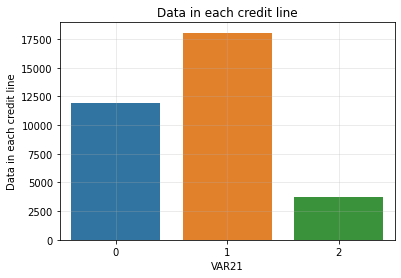

In [ ]:
plt.title('Data in each credit line')
sns.countplot(x='VAR21' , data=train_df )
plt.ylabel('Data in each credit line')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
a=train_df.corr()
a['VAR21']
plt.figure(figsize=(15,15))
plt.title('Correlation of Train_Set')
sns.heatmap(a , annot=True)
plt.show()

# **ML**

## Data Preprocessing

**Separating Variable Sets**

In [ ]:
#Separating Variable Sets
y= train_df['VAR21']
X= train_df.drop('VAR21', axis=1)

**Training and Testing Data Split (80:20)**


> *Along with Data Shuffling*



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

**Feature Normalization (useful for kNN / Neural Networks)**

In [ ]:
# Feature normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Over Sampling

**Over-Sampling using SMOTE to counteract Unbalanced Data**

In [ ]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before OverSampling, counts of label '1: {} \n".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2: {} \n".format(sum(y_train == 2)))

Before OverSampling, counts of label '0': 9527
Before OverSampling, counts of label '1: 14445 

Before OverSampling, counts of label '2: 3009 



In [ ]:
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (43335, 20)
After OverSampling, the shape of train_y: (43335,) 

After OverSampling, counts of label '0': 14445
After OverSampling, counts of label '1': 14445
After OverSampling, counts of label '2': 14445


## Under Sampling

**Under-Sampling using NearMiss to counteract Unbalanced Data**

In [ ]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before OverSampling, counts of label '1: {} \n".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2: {} \n".format(sum(y_train == 2)))

Before OverSampling, counts of label '0': 9527
Before OverSampling, counts of label '1: 14445 

Before OverSampling, counts of label '2: 3009 



In [ ]:
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After OverSampling, counts of label '0': {}".format(sum(y_train_miss == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_miss == 2)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (9027, 20)
After OverSampling, the shape of train_y: (9027,) 

After OverSampling, counts of label '0': 3009
After OverSampling, counts of label '1': 3009
After OverSampling, counts of label '2': 3009


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## SVM Classifier

**Oversampling** *(using x_train_res / y_train_res)*

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

clf.fit(X_train_res, y_train_res.ravel())

from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)

print(np.around(accuracy_score(y_test,y_pred)*100,2))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

46.92
              precision    recall  f1-score   support

           0       0.44      0.50      0.47      2425
           1       0.60      0.50      0.54      3617
           2       0.15      0.21      0.18       704

    accuracy                           0.47      6746
   macro avg       0.40      0.40      0.40      6746
weighted avg       0.50      0.47      0.48      6746



**Undersampling** *(using x_train_miss / y_train_miss)*

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

clf.fit(X_train_miss, y_train_miss.ravel())

from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print(np.around(accuracy_score(y_test,y_pred)*100,2))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

31.38
              precision    recall  f1-score   support

           0       0.41      0.27      0.33      2425
           1       0.62      0.28      0.38      3617
           2       0.13      0.64      0.22       704

    accuracy                           0.31      6746
   macro avg       0.38      0.40      0.31      6746
weighted avg       0.49      0.31      0.35      6746



**Original Data** *(using x_train / y_train)*

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train.ravel())

from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print(np.around(accuracy_score(y_test,y_pred)*100,2))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

53.62
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2425
           1       0.54      1.00      0.70      3617
           2       0.00      0.00      0.00       704

    accuracy                           0.54      6746
   macro avg       0.18      0.33      0.23      6746
weighted avg       0.29      0.54      0.37      6746



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


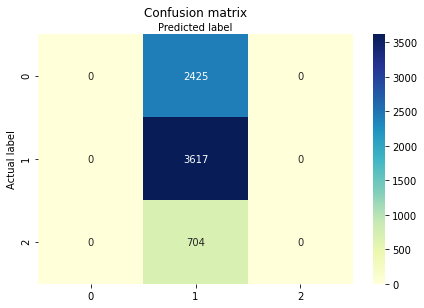

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" , fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

## kNN Classifier

**Oversampling** *(using x_train_res / y_train_res)*

In [ ]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_res, y_train_res.ravel())
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print (np.around(accuracy*100,2))

38.62


**Undersampling** *(using x_train_miss / y_train_miss)*

In [ ]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_miss, y_train_miss.ravel())
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print (np.around(accuracy*100,2))

32.11


**Original Data** *(using x_train / y_train)*

In [ ]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train.ravel())
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print (np.around(accuracy*100,2))

50.93


In [ ]:
# line graph plot
def simple_line_plot(y_values, x_values, title, xtitle, ytitle):
    """Plots a lineplot for given data."""
    plt.figure(figsize=(10,5))
    plt.plot(x_values, y_values, marker='o')
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.show()

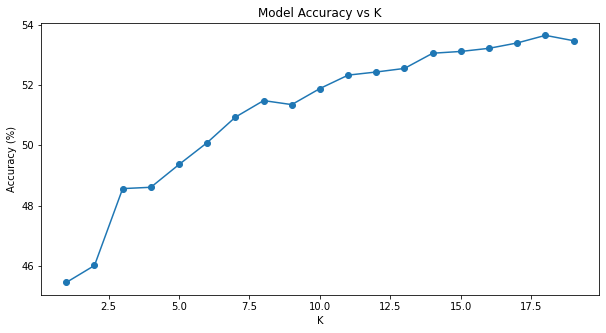

The model achieves greater than 50% Test accuracy for K = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [ ]:
# testing out performance of the KNN algorithm for different values of K
accuracies = []

K_vals = list(range(1, 20))

for k in K_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.ravel())
    pred_i = knn.predict(X_test)
    accuracies.append((1-np.mean(pred_i != y_test))*100)
    
simple_line_plot(accuracies, K_vals, 'Model Accuracy vs K', 
                'K', 'Accuracy (%)')

accuracies=np.array(accuracies)

print("The model achieves greater than 50% Test accuracy for K =", list(np.where(accuracies>=50)[0]))

## Neural Networks (MLP Algorithm)

In [ ]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter = 300, activation = 'relu',solver='adam',random_state=1)

**Oversampling** *(using x_train_res / y_train_res)*

In [ ]:
classifier.fit(X_train_res, y_train_res.ravel())
#Predicting y for X_val
y_pred = classifier.predict(X_test)

In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", np.around(accuracy(cm)*100, 2))

Accuracy of MLPClassifier :  44.17


**Undersampling** *(using x_train_miss / y_train_miss)*

In [ ]:
classifier.fit(X_train_miss, y_train_miss.ravel())
#Predicting y for X_val
y_pred = classifier.predict(X_test)

In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", np.around(accuracy(cm)*100, 2))

Accuracy of MLPClassifier :  24.03


**Original Data** *(using x_train / y_train)*

In [ ]:
classifier.fit(X_train, y_train.ravel())
#Predicting y for X_val
y_pred = classifier.predict(X_test)

In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", np.around(accuracy(cm)*100, 2))

Accuracy of MLPClassifier :  49.08


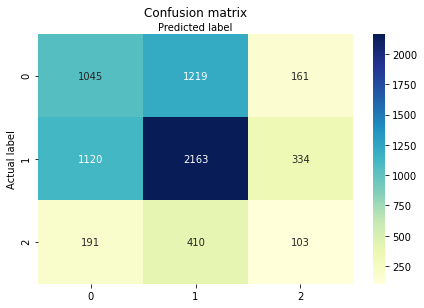

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" , fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

# **Feature Selection**

***Using Random Forrest Classifier***

---



In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Training the classifier
clf.fit(X_train_res, y_train_res.ravel())

feat_labels = list(train_df.columns)

# Name and (Gini) Importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

In [ ]:
df_feat = pd.DataFrame(list(zip(feat_labels, clf.feature_importances_)),
               columns =['Feature', 'Importance'])
df_feat.drop(19)

,Feature,Importance
0,VAR2,0.073944
1,VAR3,0.088743
2,VAR4,0.057558
3,VAR5,0.055625
4,VAR6,0.065748
5,VAR7,0.061074
6,VAR8,0.060669
7,VAR9,0.046831
8,VAR10,0.021598
9,VAR11,0.062291
